# **Install Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.neighbors import NearestNeighbors

# **Data Preprocessing**

In [6]:
df = pd.read_csv('/kaggle/input/amazon-sales-dataset/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
# Display the shape of the DataFrame (number of rows and columns)
print("Shape of DataFrame:", df.shape)

# Display column names
print("\nColumn Names:", df.columns)

# Display data types of columns
print("\nData Types:\n", df.dtypes)

# Display basic statistics for numeric columns
print("\nBasic Statistics:\n", df.describe())

# Display summary information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display the count of missing values in each column
print("\nNumber of missing values in each column labelled as null:", df.isnull().sum())
print("\nNumber of missing values in each column labelled as NaN:", df.isna().sum())

Shape of DataFrame: (1465, 16)

Column Names: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

Data Types:
 product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

Basic Statistics:
         product_id                                       product_name  \
count         1465                                         

**Features:**
1. product_id - Product ID
1. product_name - Name of the Product
1. category - Category of the Product
1. discounted_price - Discounted Price of the Product
1. actual_price - Actual Price of the Product
1. discount_percentage - Percentage of Discount for the Product
1. rating - Rating of the Product
1. rating_count - Number of people who voted for the Amazon rating
1. about_product - Description about the Product
1. user_id - ID of the user who wrote review for the Product
1. user_name - Name of the user who wrote review for the Product
1. review_id - ID of the user review
1. review_title - Short review
1. review_content - Long review
1. img_link - Image Link of the Product
1. product_link - Official Website Link of the Product

## **Feature Engineering**

In [7]:
# Remove special characters from 'discounted_price' and 'discount_percentage'
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Convert relevant columns to numeric data types
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Handle missing values by imputing with the mean for relevant columns
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['rating_count'].fillna(df['rating_count'].mean(), inplace=True)
df['discounted_price'].fillna(df['discounted_price'].mean(), inplace=True)
df['discount_percentage'].fillna(df['discount_percentage'].mean(), inplace=True)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'].fillna(df['actual_price'].mean(), inplace=True)

In [8]:
print("\nData Types:\n", df.dtypes)


Data Types:
 product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [9]:
# Calculate mean rating across all products
C = df['rating'].mean()

# Determine the minimum number of ratings required for a product to be considered (50%)
m = df['rating_count'].quantile(0.50)

# Function to calculate weighted rating using IMDb's formula
def weighted_rating(row, m=m, C=C):
    v = row['rating_count']
    R = row['rating']
    return (v / (v + m) * R) + (m / (v + m) * C)

# Apply the function to compute weighted ratings
df['weighted_rating'] = df.apply(weighted_rating, axis=1)


In [10]:
# Extract the top-most level of the categories
df['general_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Calculate the true rating_count for each row
df['user_count'] = df['user_id'].apply(lambda x: len(x.split(',')))

# Aggregate data at the product level with the categories
product_data = df.groupby('product_id').agg({
    'product_name': 'first',
    'general_category': 'first',  
    'weighted_rating': 'first',
    'user_count': 'sum',
    'discounted_price': 'mean',
    'discount_percentage': 'mean',
    'actual_price': 'mean'
}).reset_index()

# One-hot encoding for categories
df_category_encoded = pd.get_dummies(product_data['general_category'], prefix='category')

# Combine the original product_data with the one-hot encoded categories
product_data = pd.concat([product_data, df_category_encoded], axis=1)

product_data

,product_id,product_name,general_category,weighted_rating,user_count,discounted_price,discount_percentage,actual_price,category_Car&Motorbike,category_Computers&Accessories,category_Electronics,category_Health&PersonalCare,category_Home&Kitchen,category_HomeImprovement,category_MusicalInstruments,category_OfficeProducts,category_Toys&Games
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories,4.098292,16,507.0,58.0,1208.0,False,True,False,False,False,False,False,False,False
1,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories,4.148292,8,749.0,44.0,1339.0,False,True,False,False,False,False,False,False,False
2,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics,4.198292,8,399.0,20.0,499.0,False,False,True,False,False,False,False,False,False
3,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories,4.198292,8,279.0,26.0,375.0,False,True,False,False,False,False,False,False,False
4,B004IO5BMQ,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",Computers&Accessories,4.298292,8,699.0,30.0,995.0,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen,4.085969,8,259.0,74.0,999.0,False,False,False,False,True,False,False,False,False
1347,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,Home&Kitchen,4.084612,2,1299.0,48.0,2495.0,False,False,False,False,True,False,False,False,False
1348,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen,4.148936,8,279.0,44.0,499.0,False,False,False,False,True,False,False,False,False
1349,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories,4.548292,1,249.0,75.0,999.0,False,True,False,False,False,False,False,False,False


In [11]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,weighted_rating,general_category,user_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,348.217791,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,4.148292,Computers&Accessories,8
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,348.217791,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,4.048292,Computers&Accessories,8
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,348.217791,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,3.998292,Computers&Accessories,8
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,348.217791,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,4.148292,Computers&Accessories,8
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,348.217791,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,4.148292,Computers&Accessories,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,348.217791,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,4.048292,Home&Kitchen,8
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,348.217791,"230 Vol

In [14]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
weighted_rating        float64
general_category        object
user_count               int64
dtype: object

In [12]:
# Select relevant columns for clustering 
selected_columns = ['weighted_rating', 'user_count', 'discounted_price', 'discount_percentage', 'actual_price'] + list(df_category_encoded.columns)
df_selected = product_data[selected_columns]

# Data scaling (standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Principle component analysis for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)


In [51]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,general_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,348.217791,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,348.217791,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,348.217791,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,348.217791,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,348.217791,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories


## **Data Visualisation**

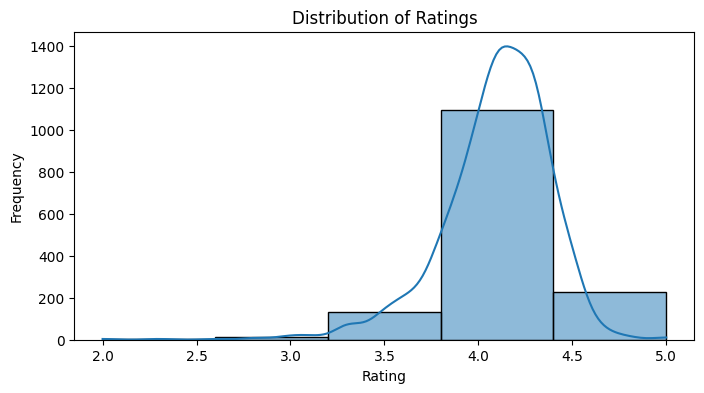

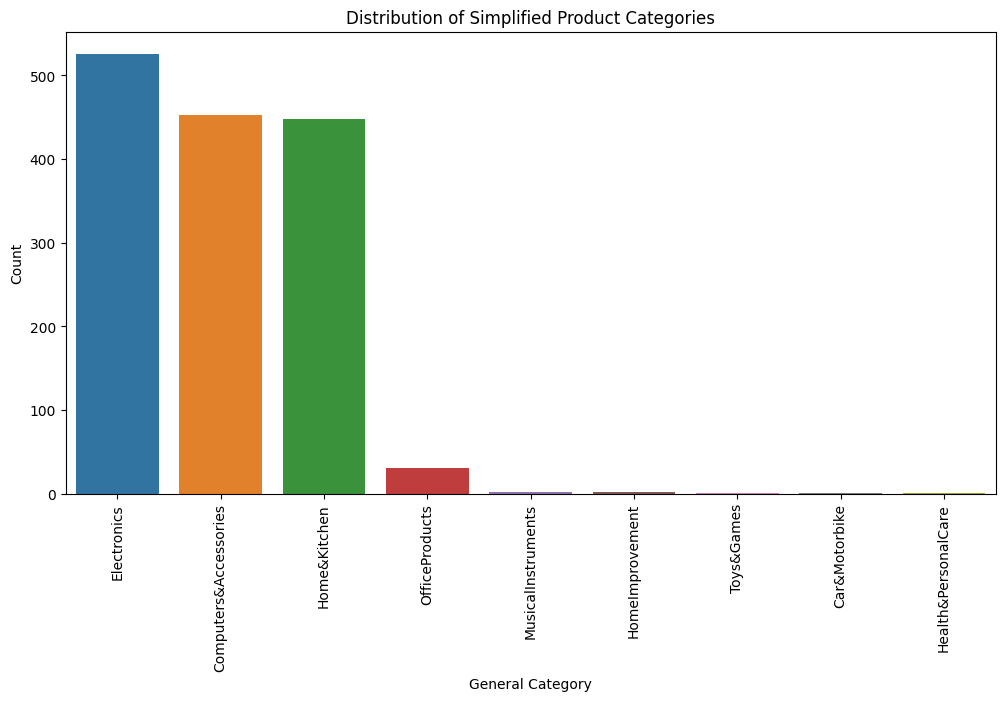

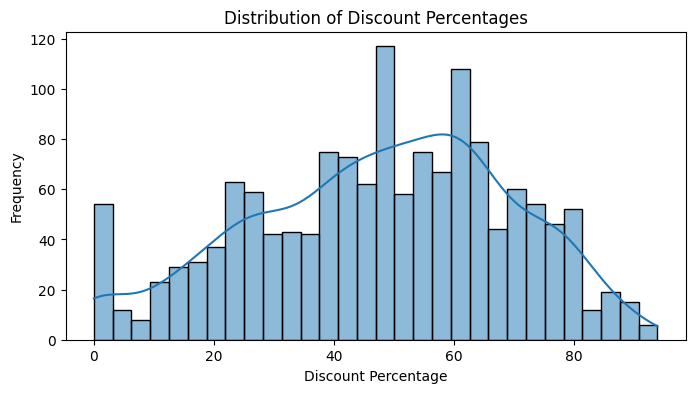

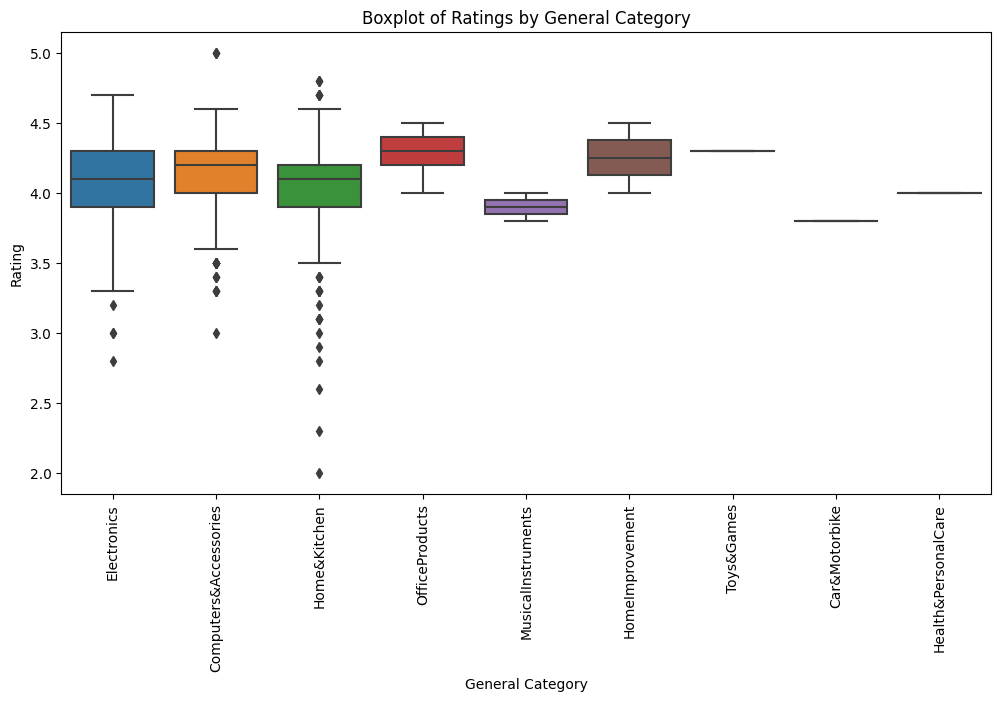

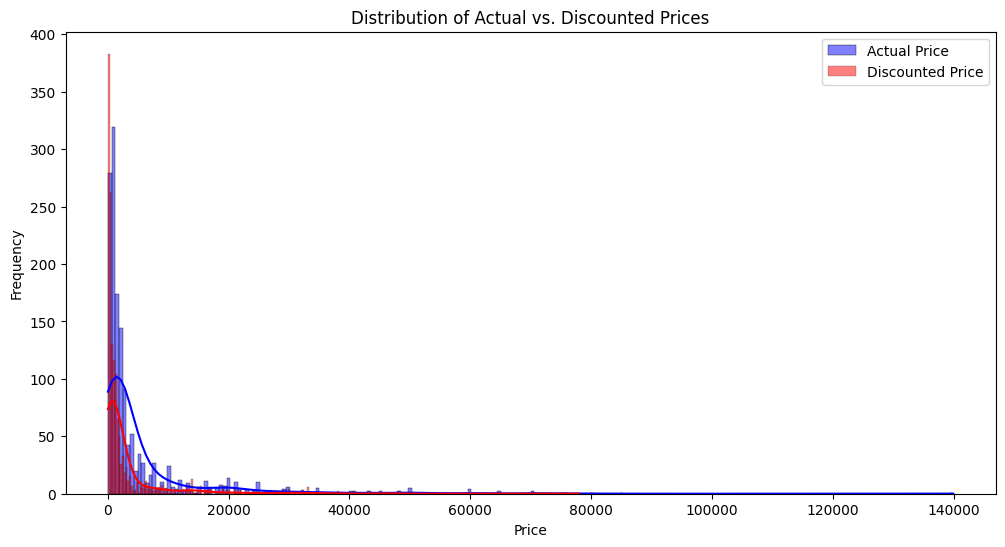

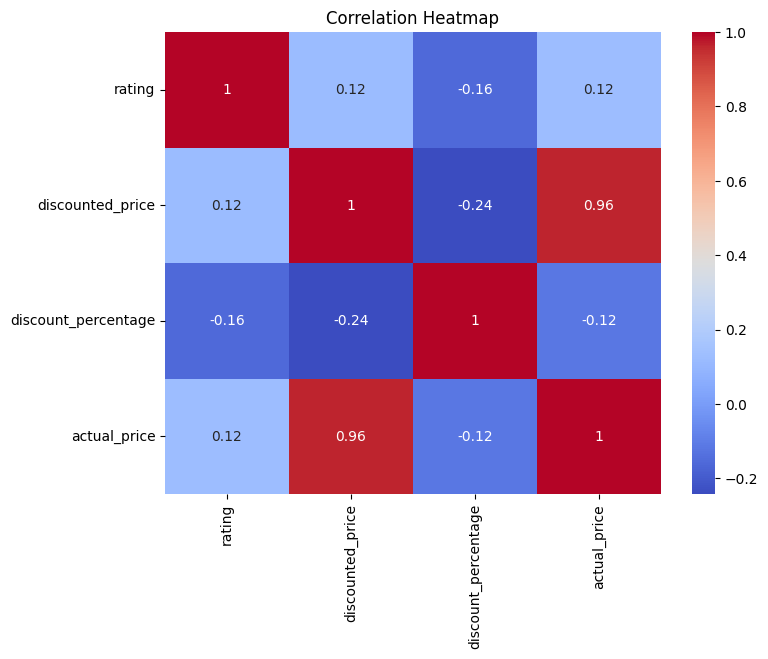

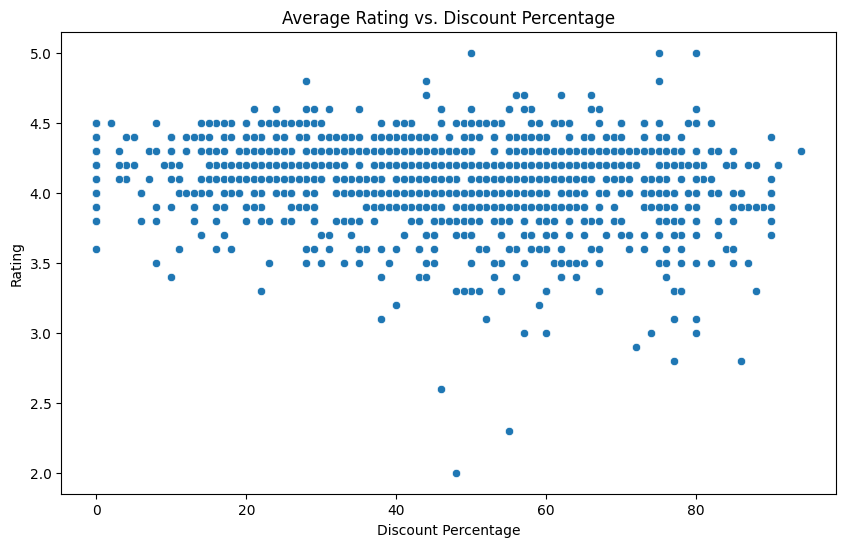

In [47]:
# Visualize distribution of ratings
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of general product categories
plt.figure(figsize=(12, 6))
sns.countplot(x='general_category', data=df, order=df['general_category'].value_counts().index)
plt.title('Distribution of Simplified Product Categories')
plt.xlabel('General Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Distribution of Discount Percentages
plt.figure(figsize=(8, 4))
sns.histplot(df['discount_percentage'], bins=30, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Ratings by General Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='general_category', y='rating', data=df, order=df['general_category'].value_counts().index)
plt.title('Boxplot of Ratings by General Category')
plt.xlabel('General Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

# Distribution of Actual vs. Discounted Prices
plt.figure(figsize=(12, 6))
sns.histplot(df['actual_price'], color='blue', label='Actual Price', kde=True)
sns.histplot(df['discounted_price'], color='red', label='Discounted Price', kde=True)
plt.title('Distribution of Actual vs. Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Correlation Heatmap
correlation_matrix = df[['rating', 'discounted_price', 'discount_percentage', 'actual_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Average Rating vs. Discount Percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df)
plt.title('Average Rating vs. Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()


# **Clustering**

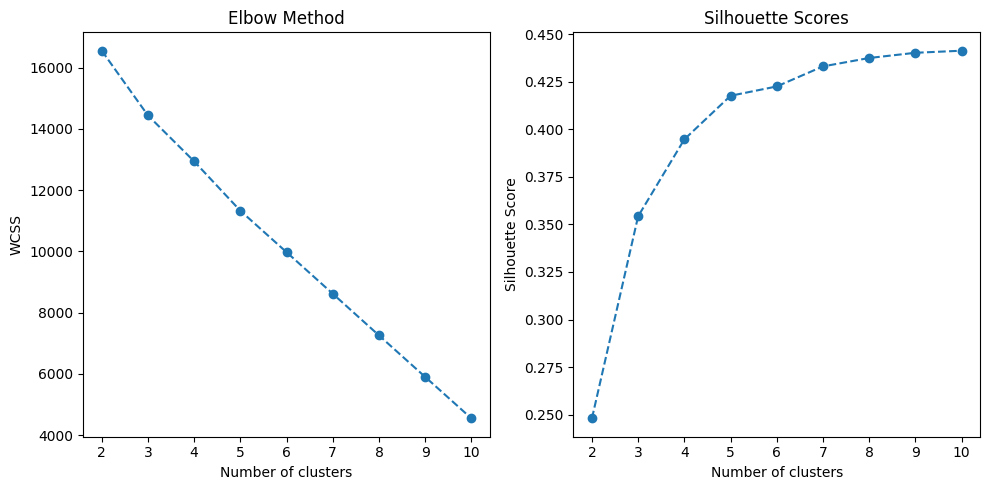

In [17]:
# Calculate the within-cluster sum of squares (WCSS) for a range of cluster numbers
wcss = []
silhouette_scores = []
possible_k_values = range(2, 11)  

for k in possible_k_values:
    temp_kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(scaled_data)
    wcss.append(temp_kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, temp_kmeans.labels_))

# Plotting the Elbow method graph
plt.figure(figsize=(10, 5))

# Elbow Method plot
plt.subplot(1, 2, 1)
plt.plot(possible_k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Silhouette Score plot
plt.subplot(1, 2, 2)
plt.plot(possible_k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## **K-Means**

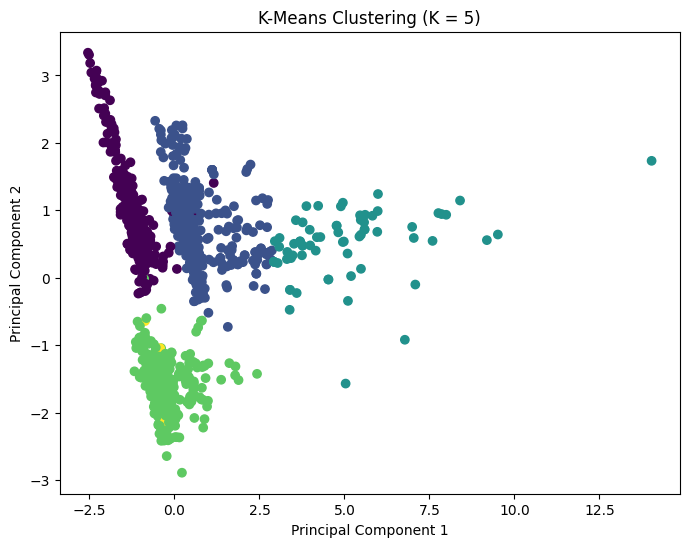

Cluster Assignments:
       product_id                                       product_name  \
0     B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1     B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
2     B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
3     B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   
4     B004IO5BMQ  Logitech M235 Wireless Mouse, 1000 DPI Optical...   
...          ...                                                ...   
1346  B0BPCJM7TB  WIDEWINGS Electric Handheld Milk Wand Mixer Fr...   
1347  B0BPJBTB3F  Khaitan ORFin Fan heater for Home and kitchen-...   
1348  B0BQ3K23Y1  Oratech Coffee Frother electric, milk frother ...   
1349  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   
1350  B0BR4F878Q  Swiffer Instant Electric Water Heater Faucet T...   

      kmeans_cluster  
0                  0  
1                  0  
2                  1  
3                  0  
4         

In [14]:
# Number of clusters (K)
k = 5  

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
product_data['kmeans_cluster'] = kmeans.fit_predict(scaled_data)  # Assign clusters to product_data

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=product_data['kmeans_cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (K = {})'.format(k))
plt.show()

# Display the cluster assignments for each product
print("Cluster Assignments:\n", product_data[['product_id', 'product_name', 'kmeans_cluster']])


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


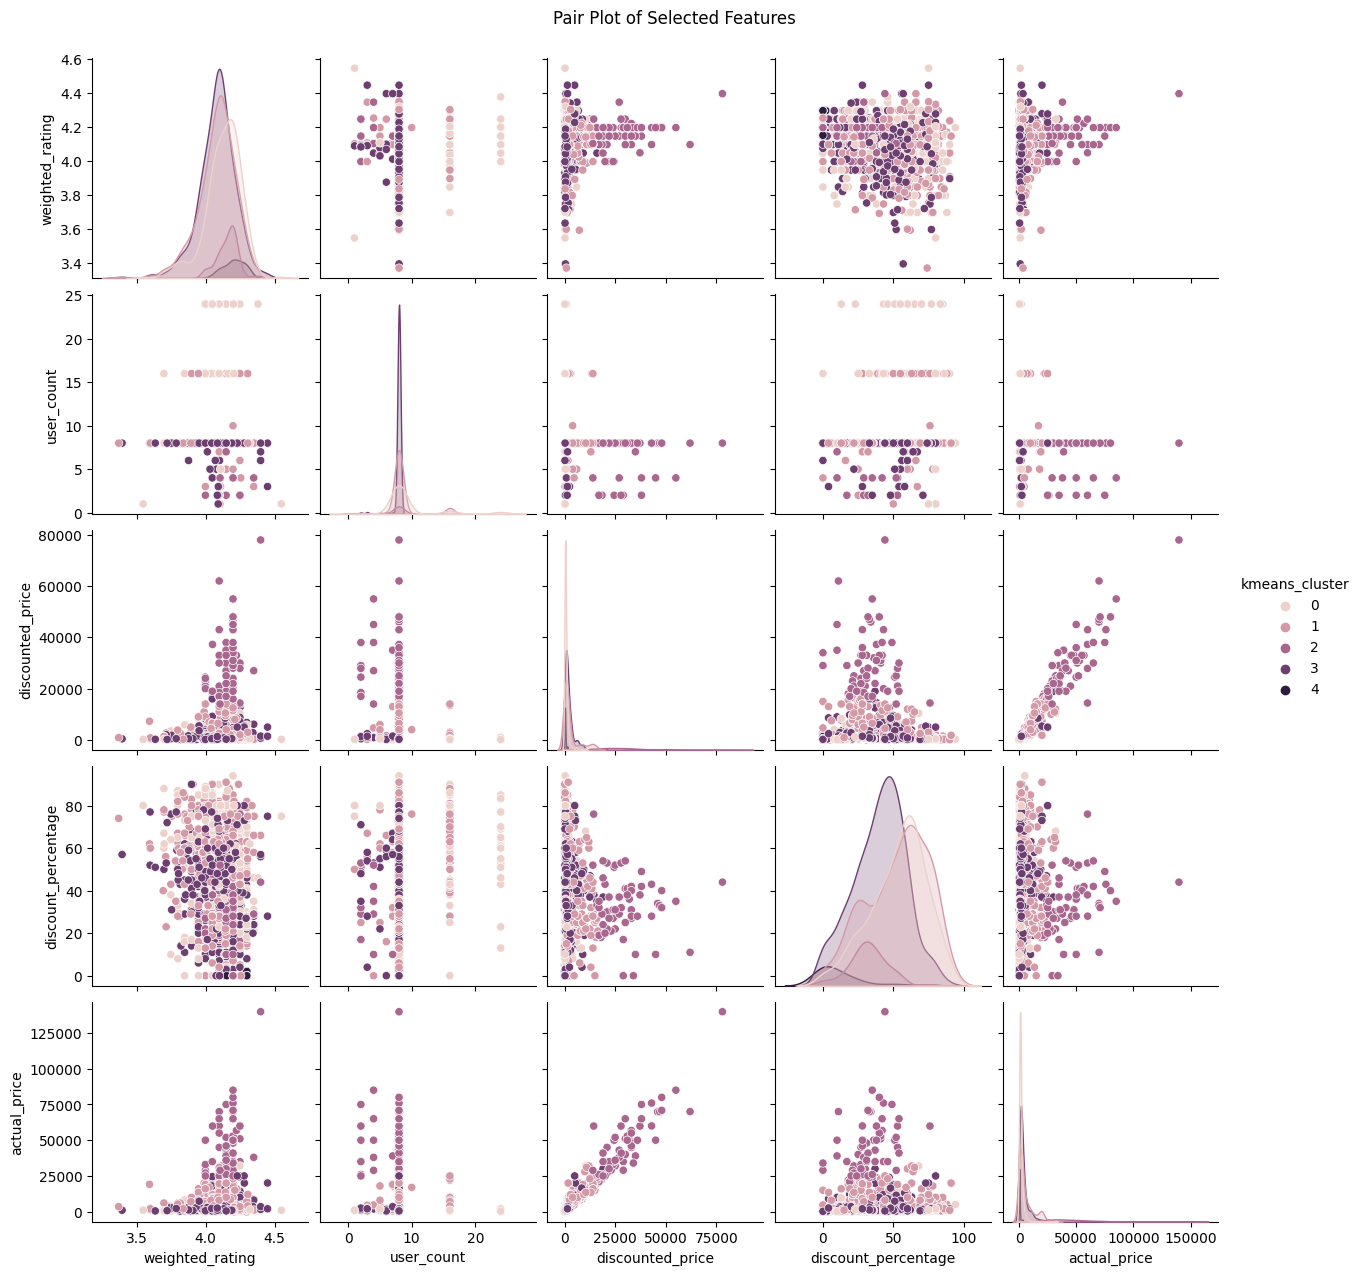

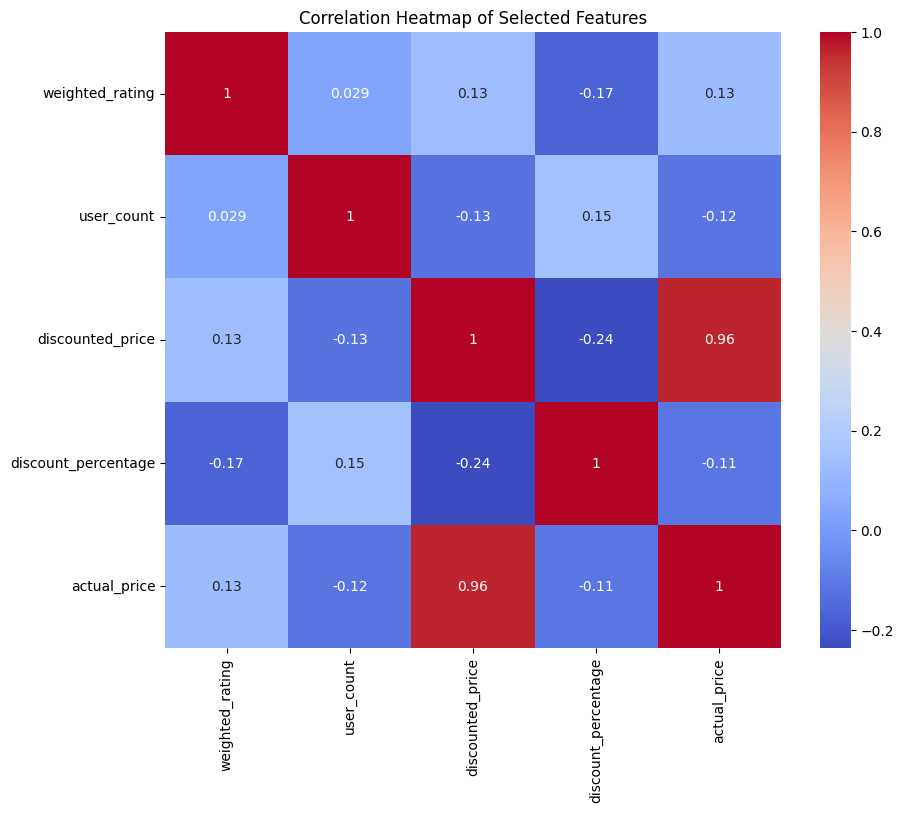

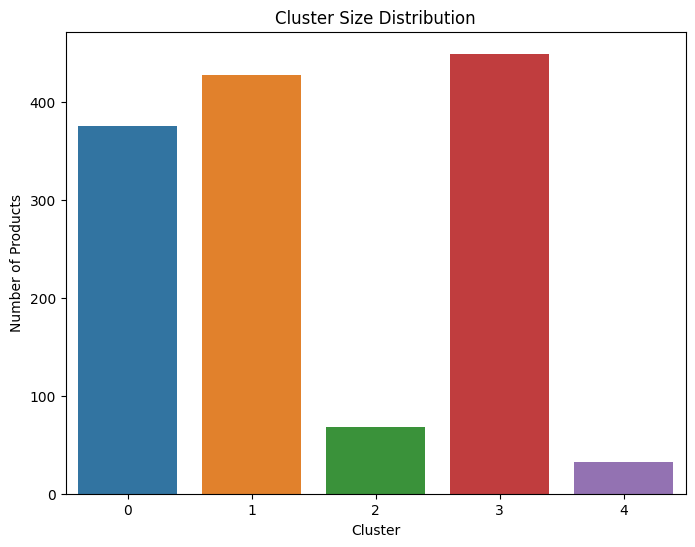

In [25]:
# Subset of columns for visualization
subset_columns = ['weighted_rating', 'user_count', 'discounted_price', 'discount_percentage', 'actual_price']

# Pair Plot of Selected Features
sns.pairplot(product_data, hue='kmeans_cluster', vars=subset_columns)
plt.suptitle('Pair Plot of Selected Features')
plt.show()

# Correlation Heatmap of Selected Features
correlation_matrix = product_data[subset_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# Cluster Size Distribution
cluster_counts = product_data['kmeans_cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Products')
plt.title('Cluster Size Distribution')
plt.show()


## **Agglomerative Hierarchical Clustering**

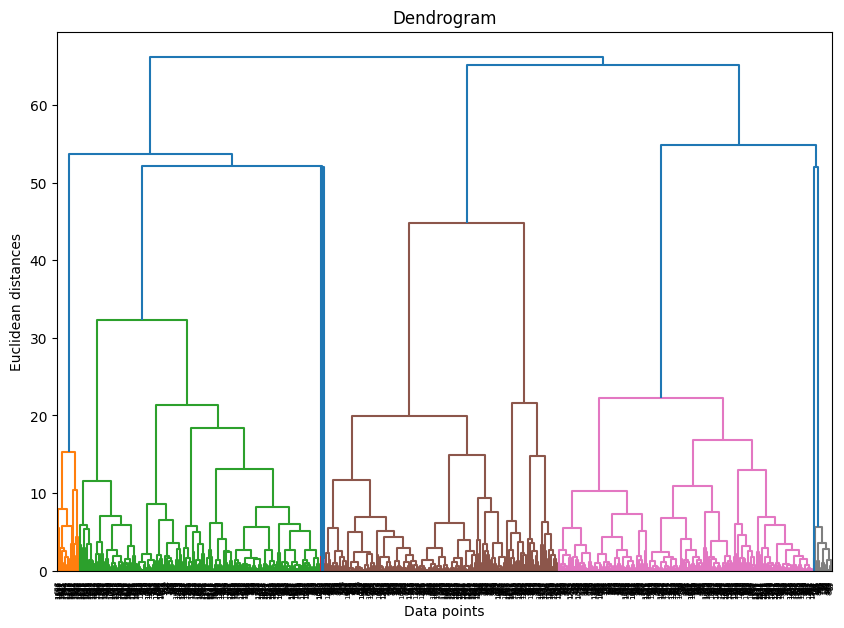

In [32]:
# Create dendogram; each row starts of as a cluster then merges
Z = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.xlabel("Data points")
plt.show()

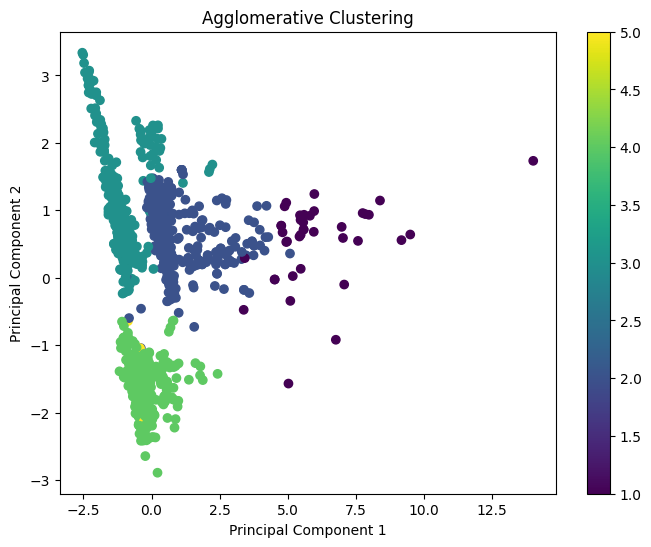

In [33]:
# Attach cluster labels to data
n = 5 # Optimal cluster number is longest veritical line without intersections from the dendogram
# model = AgglomerativeClustering(n_clusters=n)
# product_data['hierarchical_cluster'] = model.fit_predict(scaled_data)

cluster_labels = fcluster(Z, t=n, criterion='maxclust')
product_data['hierarchical_cluster'] = cluster_labels

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=product_data['hierarchical_cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering')
plt.colorbar()
plt.show()

In [34]:
product_data

,product_id,product_name,general_category,weighted_rating,user_count,discounted_price,discount_percentage,actual_price,category_Car&Motorbike,category_Computers&Accessories,category_Electronics,category_Health&PersonalCare,category_Home&Kitchen,category_HomeImprovement,category_MusicalInstruments,category_OfficeProducts,category_Toys&Games,kmeans_cluster,hierarchical_cluster
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories,4.098292,16,507.0,58.0,1208.0,False,True,False,False,False,False,False,False,False,0,3
1,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories,4.148292,8,749.0,44.0,1339.0,False,True,False,False,False,False,False,False,False,0,3
2,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics,4.198292,8,399.0,20.0,499.0,False,False,True,False,False,False,False,False,False,1,2
3,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories,4.198292,8,279.0,26.0,375.0,False,True,False,False,False,False,False,False,False,0,3
4,B004IO5BMQ,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",Computers&Accessories,4.298292,8,699.0,30.0,995.0,False,True,False,False,False,False,False,False,False,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen,4.085969,8,259.0,74.0,999.0,False,False,False,False,True,False,False,False,False,3,4
1347,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,Home&Kitchen,4.084612,2,1299.0,48.0,2495.0,False,False,False,False,True,False,False,False,False,3,4
1348,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen,4.148936,8,279.0,44.0,499.0,False,False,False,False,True,False,False,False,False,3,4
1349,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories,4.548292,1,249.0,75.0,999.0,False,True,False,False,False,False,False,False,False,0,3


# **Recommendation System**

In [50]:
selected_columns = ['weighted_rating', 'user_count', 'discounted_price', 'discount_percentage', 'actual_price'] + list(df_category_encoded.columns)
df_selected = product_data[selected_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

In [52]:
def recommend_for_new_product_hierarchical(new_product_features, scaler, num_recommendations=5):
    """
    Recommend products for a new product based on its features using agglomerative clustering.
    
    Parameters:
    - new_product_features: List of features for the new product.
    - scaler: Fitted scaler for feature scaling.
    - num_recommendations: Number of recommendations to return.
    
    Returns:
    - DataFrame containing recommended products.
    """
    # Convert single product features into 2D array for transformation
    new_product_features = [new_product_features]
    
    # Scale the features
    scaled_features = scaler.transform(new_product_features)
    
    # Use NearestNeighbors to find the closest existing data point
    nn = NearestNeighbors(n_neighbors=1).fit(scaled_data)
    distances, indices = nn.kneighbors(scaled_features)
    
    # Retrieve the cluster of the closest data point
    closest_data_point = product_data.iloc[indices[0]]
    predicted_cluster = closest_data_point['hierarchical_cluster'].values[0]
    
    # Retrieve products from the predicted cluster
    similar_products = product_data[product_data['hierarchical_cluster'] == predicted_cluster]
    
    # Return the top 'num_recommendations' products from the cluster
    return similar_products.head(num_recommendations)

# Example usage:
new_product_features = [
    4.5,  # weighted_rating
    20,   # user_count
    500,  # discounted_price
    10,   # discount_percentage
    550,  # actual_price
    # Add 0s for the one-hot encoded category columns
    0, 0, 0, 0, 0, 0, 0, 0, 0
]

recommendations_hierarchical = recommend_for_new_product_hierarchical(new_product_features, scaler)
recommendations_hierarchical


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,product_id,product_name,general_category,weighted_rating,user_count,discounted_price,discount_percentage,actual_price,category_Car&Motorbike,category_Computers&Accessories,category_Electronics,category_Health&PersonalCare,category_Home&Kitchen,category_HomeImprovement,category_MusicalInstruments,category_OfficeProducts,category_Toys&Games,kmeans_cluster,hierarchical_cluster
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories,4.098292,16,507.0,58.0,1208.0,False,True,False,False,False,False,False,False,False,0,3
1,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories,4.148292,8,749.0,44.0,1339.0,False,True,False,False,False,False,False,False,False,0,3
3,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories,4.198292,8,279.0,26.0,375.0,False,True,False,False,False,False,False,False,False,0,3
4,B004IO5BMQ,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",Computers&Accessories,4.298292,8,699.0,30.0,995.0,False,True,False,False,False,False,False,False,False,0,3
5,B005FYNT3G,SanDisk Cruzer Blade 32GB USB Flash Drive,Computers&Accessories,4.198292,8,289.0,56.0,650.0,False,True,False,False,False,False,False,False,False,0,3


In [58]:
product_data_path = "/kaggle/working/product_data.csv"
product_data.to_csv(product_data_path, index=False)
product_data_path

'/kaggle/working/product_data.csv'